In [163]:
from sympy import Symbol, S, solveset, Eq, diff, limit, oo, sqrt, symbols, cos, sin, exp, solve
from sympy.calculus.util import continuous_domain, function_range
from sympy.solvers.solveset import linsolve, nonlinsolve
import math

import numpy as np
from sympy import *
init_printing(use_unicode=True)

from scipy.optimize import minimize
from scipy.optimize import least_squares

import matplotlib.pyplot as plt

**Задание 1.7**

Найдите значение метрики $L2-loss$


In [2]:
real = [6, 7, 6,  4, 5,	6, 8]
pred = [6.4, 7.1, 5.9, 4.2, 5.2, 6.2, 7.5]
l2_loss = 0
for i in range(7):
    l2_loss += (real[i] - pred[i])**2
round(l2_loss, 2)

0.55

**Задание 1.8**

Дана функция $f(x,y) = \sqrt{x^2 + y^2}$

In [157]:
# Вычислите f(2,1). Ответ округлите до второго знака после точки-разделителя
x, y = symbols("x, y")
f = sqrt(x**2 + y**2)
f.evalf(3, subs={x:2, y: 1})

In [162]:
# область значенй функции
function_range(f, x, y)

AttributeError: 'Symbol' object has no attribute 'is_subset'

**Задание 1.9**

Дана функция $f(x_1, x_2, x_3) = \frac 1 {1 - exp^{-2*(x_1 + x_2 + x_3)}}$

In [5]:
# Вычислите f(1,1,0)
round(1/(1 + math.exp(-2*(1 + 1 + 0))),2)

0.98

In [6]:
# Вычислите f(0.1,0.3,0.6)
round(1/(1+math.exp(-2*(0.1+0.3+0.6))),2)

0.88

**Задание 1.10**

Найти $L2-loss$

In [7]:
round((2.1 - 2)**2 + (2.9 -4)**2 + (4.1 - 6)**2, 2)

4.83

попробуем найти производную для функции $f(a,b,c) = 5ab - acos(c) + a^8 + bc^2$ по переменной $a$

In [8]:
a, b, c = symbols('a b c', real=True)
f = 5*a*b - a*cos(c) + a**8 + c**2*b

diff(f, a)

8*a**7 + 5*b - cos(c)

**Задание 2.5**

Вычислите частные производные для функции $u = x^2 + 3xy + 4y^2$ в точке $(1,1)$ 

In [9]:
u = x**2 + 3*x*y + 4*y**2
u_x = diff(u, x)
u_y = diff(u, y)
u_y

3*x + 8*y

**Задание 2.6**

Найдите частные производные для функции $g = ysin x + sin y$

In [10]:
g = y* sin(x) + sin(y)
diff(g, y)

sin(x) + cos(y)

**Задание 3.1**

Найдите минимум для функции $ f(x) = -2x^3 - 3x^2 +12x - 4$

In [15]:
f_3_1 = -2*x**3 - 3*x**2 +12*x - 4
fd_3_1 = diff(f_3_1, x)
solveset(Eq(fd_3_1, 0), x)
diff(fd_3_1, x).subs(x, 1)

-18

**Задание 3.2**

Найдите матрицу Гессе для функции $ f(x,y) = e^x + 5y^3x$

In [56]:
f_3_2 = exp(x) + 5*(y**3)*x
fx_3_2 = diff(f_3_2, x)
fy_3_2 = diff(f_3_2, y)
fxx_3_2 = diff(fx_3_2, x)
fxy_3_2 = diff(fx_3_2, y)
fyy_3_2 = diff(fy_3_2, y)

h_3_2 = np.array([[fxx_3_2, fxy_3_2], [fxy_3_2, fyy_3_2]])
print(h_3_2)

[[exp(x) 15*y**2]
 [15*y**2 30*x*y]]


In [24]:
A = np.array([
    [fxx_3_2, fxy_3_2],
    [fxy_3_2, fyy_3_2]
    ]
)
print(A)

[[exp(x) 15*y**2]
 [15*y**2 30*x*y]]


In [28]:
# Решение системы уравнений

eq1 = Eq(3*x**2+3*y**2-15,0)
eq2 = Eq(6*x*y-12, 0)
 
sol = solve([eq1, eq2], [x, y])
sol

[(-2, -1), (-1, -2), (1, 2), (2, 1)]

**Задание 3.3**

Подставьте в матрицу Гессе $\left( \begin{matrix} 6x\ \ 6y\\ 6y\ \ 6x \end{matrix} \right)$ каждую из точек $M1(1;2), M2(-2;-1), M3(2;1), M4(-1;-2)$ и определите их характер

In [34]:
mat_h = np.mat("-6, -12; -12, -6")
evalue, evect = np.linalg.eig(mat_h)
evalue

array([  6., -18.])

**Задание 3.4**

Найдите экстремумы функции $z = 4x^2 - 6xy - 34x + 5y^2 + 42y + 7$ 

In [47]:
z=4*x**2 - 6*x*y - 34*x +5* y**2 + 42*y + 7
zx = diff(z, x)
zy = diff(z, y)
eq_zx = Eq(zx, 0)
eq_zy = Eq(zy, 0)
m_3_4 = solve([eq_zx, eq_zy], [x, y])
zxx = diff(zx, x)
zxy = diff(zx, y)
zyy = diff(zy, y)
h_3_4 = np.mat(f"{zxx}, {zxy}; {zxy}, {zyy}")
ev_3_4, _ = np.linalg.eig(h_3_4)
if ev_3_4[0] > 0 and ev_3_4[1] > 0:
    print(f'Точка {m_3_4} - максимум')
elif ev_3_4[0] < 0 and ev_3_4[1] < 0:
    print(f'Точка {m_3_4} - минимум')

Точка {x: 2, y: -3} - максимум


**Задание 3.5**

Вычислите матрицу Гессе для функции $ f(x,y) = x^3 - 2xy - y^6$ в точке $ (1; 2) $  и найдите её определитель:

In [71]:
f_3_5 = x**3 - 2*x*y - y**6
fx_3_5 = diff(f_3_5, x)
fy_3_5 = diff(f_3_5, y)
fxx_3_5 = diff(fx_3_5, x)
fxy_3_5 = diff(fx_3_5, y)
fyy_3_5 = diff(fy_3_5, y)

h_3_5 = Matrix([[fxx_3_5.subs(x, 1), fxy_3_5], [fxy_3_5, fyy_3_5.subs(y, 2)]])
print(h_3_5.det())

-2884


**Задание 3.9**

Найдите экстремумы функции $k = x^3 + y^3 - 3xy $

In [102]:
k = x**3 + y**3 - 3*x*y
kx = diff(k, x)
ky = diff(k, y)
eq_kx = Eq(kx, 0)
eq_ky = Eq(ky, 0)
m_3_9 = solve([eq_kx, eq_ky], [x, y])
m_3_9
kxx = diff(kx, x)
kxy = diff(kx, y)
kyy = diff(ky, y)

for i in range(len(m_3_9) - 2):
    h_3_9 = Matrix([[kxx.subs(x, m_3_9[i][0]), kxy], [kxy, kyy.subs(y, m_3_9[i][1])]])
    s_p = list(h_3_9.eigenvals().keys())
    if s_p[0] > 0 and s_p[1] > 0:
        print(f'Точка {m_3_9[i]} - минимум')
    elif s_p[0] < 0 and s_p[1] < 0:
        print(f'Точка {m_3_9[i]} - максимум')
    else:
        print(f'Точка {m_3_9[i]} - седловая')

Точка (0, 0) - седловая
Точка (1, 1) - минимум


## **Оптимизация функций**

### Функция Розенброка (функция банана, функция долины)

In [104]:
def func_rosen(x):
    r = np.sum(100*(x[1:]-x[:-1]**2)**2 + (1-x[:-1])**2, axis=0)
    return r

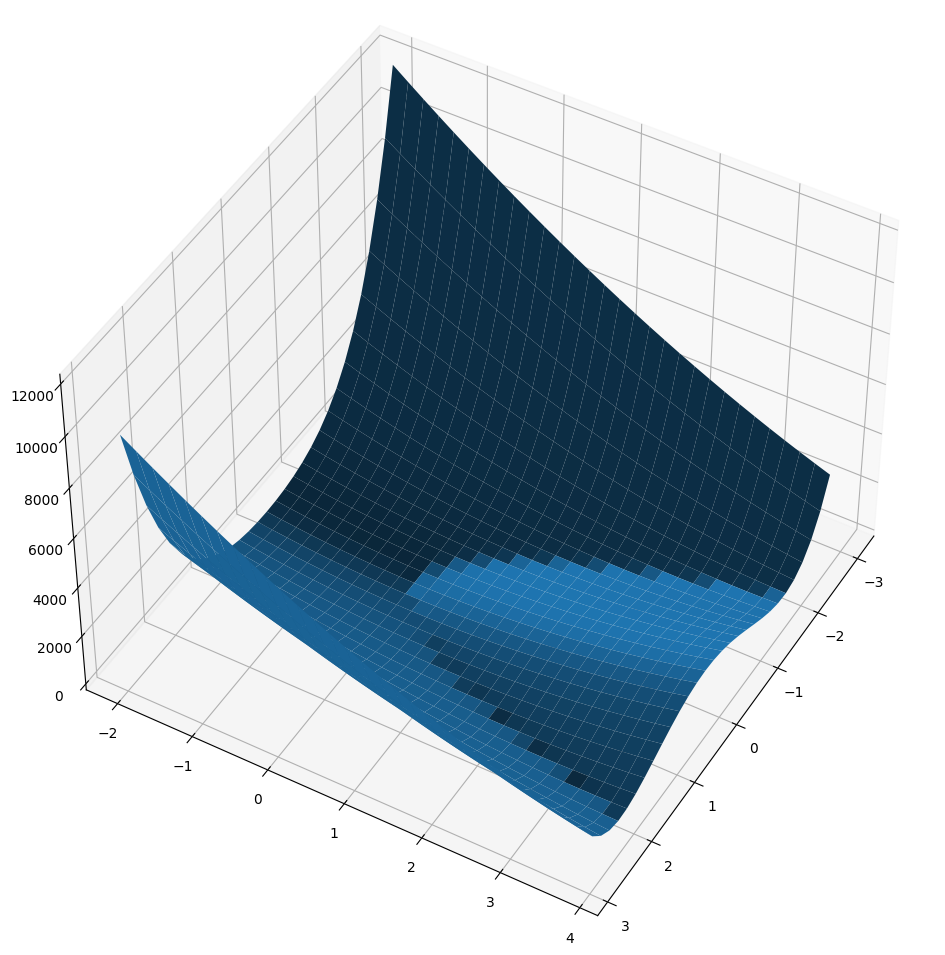

In [110]:
graph = plt.figure(figsize=[18, 12])
ax = graph.add_subplot(projection='3d')
ax.view_init(45, 30)
x1 = np.arange(-3, 3, 0.2)
x2 = np.arange(-2, 4, 0.2)
x1, x2 = np.meshgrid(x1, x2)
y = func_rosen(np.array([x1,x2]))
surf = ax.plot_surface(x1, x2, y)
plt.show()

#### метод Пауэлла

In [112]:
x1 = np.array([2.4, 1.5, 2.1, 0.7, 1.1])
result_point = minimize(func_rosen, x1, method='powell')
print(result_point.x)

[1. 1. 1. 1. 1.]


#### метод Нелдера-Мида (симплекс-метод)

In [113]:
x1 = np.array([2.4, 1.5, 2.1, 0.7, 1.1])
result_point = minimize(func_rosen, x1, method='nelder-mead')
print(result_point.x)

[1.02760651 1.05589639 1.11509457 1.2440091  1.54862169]


**Задание 4.5**

Оптимизируйте функцию Розенброка с помощью уже известного вам метода наименьших квадратов с использованием той же точки, которая фигурировала в наших решениях до этого.

In [119]:
x1 = np.array([2.4, 1.5, 2.1, 0.7, 1.1])
result_point = least_squares(func_rosen, x1)
print(result_point.x.round(3))

[0.939 0.882 0.776 0.603 0.361]


## **Метод множителей Лагранжа**

**Задание 5.1**

Найдите экстремумы функции $f(x,y) = 4x + 3y$ на множестве, заданном уравнением $x^2 + y^2 = 1$.

In [196]:
x, y, lam = symbols("x, y, lam")

f_5_1 = 4*x + 3*y

# формулируем функцию Лагранжа и дифференцируем её по всем переменным
lf = f_5_1 - lam*(x**2 + y**2 - 1) #
lfx = diff(lf,x)
lfy = diff(lf, y)
lflam = diff(lf, lam)

# Решаем систему уранвнений, приравняв производные к нулю 
eq_x = Eq(lfx, 0)
eq_y = Eq(lfy, 0)
eq_l = Eq(lflam, 0)
s_5_1 = nonlinsolve([eq_x, eq_y, eq_l], [x, y, lam]) # даннй метод выводит объект FiniteSet, а solve - список

# подставляем найденные корни в функцию и выводим результат: наибольшее значение - максимум функции, а наименьшее - минимум
display(f_5_1.subs({x: s_5_1.args[0][0], y: s_5_1.args[0][1]}))
display(f_5_1.subs({x: s_5_1.args[1][0], y: s_5_1.args[1][1]}))

In [198]:
a,b,w=symbols(' a b w' )
g = 3*a**2 + a + 4*b + 5*b**2
print('Целевая функция для аргументов a и b :\n f = ', g)
q = a + b - 200
print('Функция ограничений: ', q,'= 0')
f = g + w*q
print('Функция Лагранжа :\n ',f)
fa = f.diff(a)
print('df/da =',fa,'= 0')
fb = f.diff(b)
print('df/db =',fb,'= 0')
fw = f.diff(w)
print('df/dw =',fw,'= 0')
sols = solve([fa,fb,fw],a,b,w)
print('Стационарная точка M(x,y):\n',float(sols[a]),',',float(sols[b]))

Целевая функция для аргументов a и b :
 f =  3*a**2 + a + 5*b**2 + 4*b
Функция ограничений:  a + b - 200 = 0
Функция Лагранжа :
  3*a**2 + a + 5*b**2 + 4*b + w*(a + b - 200)
df/da = 6*a + w + 1 = 0
df/db = 10*b + w + 4 = 0
df/dw = a + b - 200 = 0
Стационарная точка M(x,y):
 125.1875 , 74.8125


**Задание 5.3**

Представьте, что вы решаете задачу классификации методом опорных векторов и хотите оценить расстояние от объекта до разделяющей прямой с помощью метода Лагранжа. Если объект имеет координаты $(2;1)$, а прямая задана уравнением $x+y=1$, то каким будет квадрат расстояния от этого объекта до прямой?

In [204]:
x,y,w=symbols(' x y w' )
g = ((x-2)**2+(y-1)**2)**(0.5)
q = x + y - 1
f = ((x-2)**2+(y-1)**2)**(0.5) + w*(x + y - 1)
fx = f.diff(x)
fy = f.diff(y)
fw = f.diff(w)
sols = solve([fx,fy,fw],x,y,w)
(g**2).subs({x:sols[0][0], y:sols[0][1]})

**Задание 5.4**

Прямоугольный параллелепипед имеет объём $1  м^3$. Чему равна минимальная площадь его поверхности?

In [211]:
a, b, c, l=symbols('a b c l' )
s = 2*(a*b + a*c + b*c)
v = a*b*c - 1
f = s + l*v
fa = f.diff(a)
fb = f.diff(b)
fc = f.diff(c)
fl = f.diff(l)

sols = solve([fa,fb,fc,fl],a,b,c,l)
s.subs({a:sols[0][0], b:sols[0][1], c:sols[0][2]})

#### **Ограничения заданы в виде неравенств**

Длина забора — 20 метров. Какова максимальная площадь прямоугольного участка, который можно огородить? Хотя бы одна из сторон прямоугольника должна быть не меньше 6.

In [215]:
# Создаём переменные
x1, x2, x1_tilde, lambda1, lambda2 = symbols(
    "x_1 x_2 xtilde_2 \lambda_1 \lambda_2", real=True
)

# Пишем систему уравнений для переменных
dLdx1 = -x2 + lambda1 - lambda2
dLdx2 = -x1 + lambda1
dLdx1_tilde = 2 * lambda2 * x1_tilde
dLdlambda1 = x1 + x2 - 10
dLdlambda2 = -x1 + 6 + x1_tilde**2

# Решаем систему уравнений с помощью функции solve
solution = solve(
    [dLdx1, dLdx2, dLdx1_tilde, dLdlambda1, dLdlambda2],
    x1,
    x2,
    x1_tilde,
    lambda1,
    lambda2,
)

print(f'Максимальная площадь составит - {solution[0][0]*solution[0][1]} кв. м')

Максимальная площадь составит - 24 кв. м


## **ГРАДИЕНТ**

In [216]:
# Зададим массив, для которого хотим найти градиент, и вычислим его
f = np.array([3, 7, 14, 23, 36, 47], dtype=float)
 
np.gradient(f)


array([ 4. ,  5.5,  8. , 11. , 12. , 11. ])

**Задание 6.6**

$L^2-loss$ функция имеет вид $L = (2.1 - w_0 - w_0)^2 + (2.9 - w_0 - 3w_1)^2 + (4.1 - w_0 - 5w_1)^2$

Вычислите точку, в которой $gradL = 0$

In [228]:
w, v = symbols('w v')
u = (2.1 - w - v)**2 + (2.9 - w - 3*v)**2 + (4.1 - w - 5*v)**2
uw = diff(u, w)
uv = diff(u, v)
solution = solve(
    [uw, uv],
    w,
    v
)
solution

**Задание 6.7**

Пусть дан одномерный массив $f = np.array([8, 2, 8, 3, 5, 6, 5, 15])$

Вычислите градиент массива , увеличив шаг сетки в семь раз, и укажите значение седьмого элемента массива получившихся градиентов  (порядок элементов начинается с 0).

In [229]:
f = np.array([8, 2, 8, 3, 5, 6, 5, 15])
np.gradient(f, 7)

array([-0.85714286,  0.        ,  0.07142857, -0.21428571,  0.21428571,
        0.        ,  0.64285714,  1.42857143])

## **Градиентный спуск**

### Визуализация

In [230]:
# Определим простейшую выпуклую функцию
def fun(x, y, a=1, b=1):
    return a * (x ** 2) + b * (y ** 2)

In [231]:
# Определим функцию, которая вычислит градиент

def grad(x, y, a=1, b=1):
    return np.array([2 * a * x, 2 * b * y])

In [236]:
# запрограммируем простейший вариант для градиентного спуска

def grad_descend(grad, step_size=0.2, num_steps=30):
    lst = []
    x = np.random.uniform(0, 3, size = 2)
    lst.append(x)
    for i in range(num_steps):
        x = x - step_size * grad(lst[-1][0], lst[-1][1])
        lst.append(x)
    return np.array(lst)
# Напишем функцию, которая будет строить график

def plot_grad(fun, trace):
    fig = plt.figure(figsize=(10, 8))
    x_ = np.linspace(-1, 1, 100)
    y_ = np.linspace(-1, 1, 100)
    x, y = np.meshgrid(x_, y_)
    z = fun(x, y)
    ax = fig.add_subplot(1, 1, 1, projection='3d')
    ax.plot_surface(x, y, z, alpha=0.6)
    ax.contour(x, y, z, zdir='z', offset=z.min())
    z_trace = fun(trace[:, 0], trace[:, 1])
    ax.plot(trace[:, 0], trace[:, 1], z_trace, "o-")
    ax.set_xlim(x.min(), x.max())
    ax.set_ylim(y.min(), y.max())
    ax.set_zlim(z.min(), z.max())

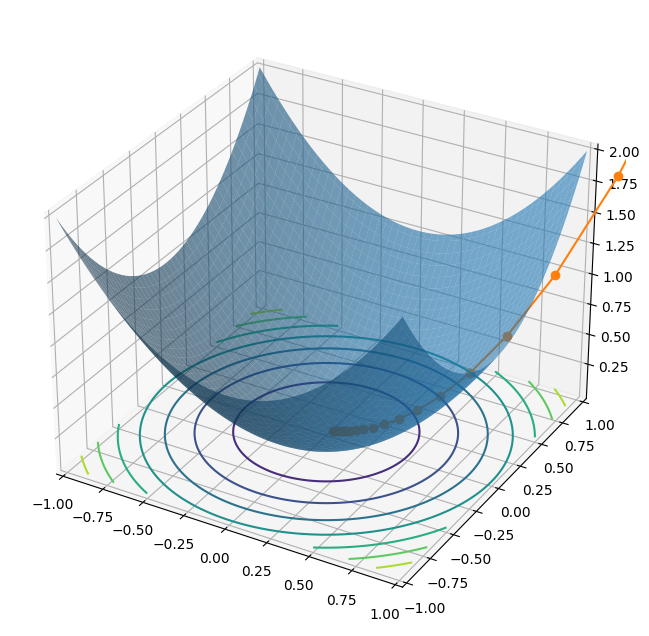

In [237]:
# Визуализируем 
trace = grad_descend(grad, 0.1, 20)
plot_grad(fun, trace = trace)